In [37]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [75]:
# a
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(url,header =None)

In [52]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [17]:
df.isnull().sum()

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
 4   4       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [19]:
df.describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [27]:
df.drop(4,axis=1,inplace = True)
df.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [79]:
df_num =  df.drop(4,axis=1)
sc = StandardScaler()
df_scaled = sc.fit_transform(df_num)

In [80]:
# b
curve=[]
for i in range(2,11):
    km = KMeans(n_clusters=i)
    km.fit(df_scaled)
    curve.append(km.inertia_)
curve

[223.73200573676345,
 140.96581663074699,
 114.36537752920944,
 91.03697127893268,
 80.65709769594945,
 72.6410767896254,
 63.58072208702229,
 54.279578402961754,
 47.8845501689041]

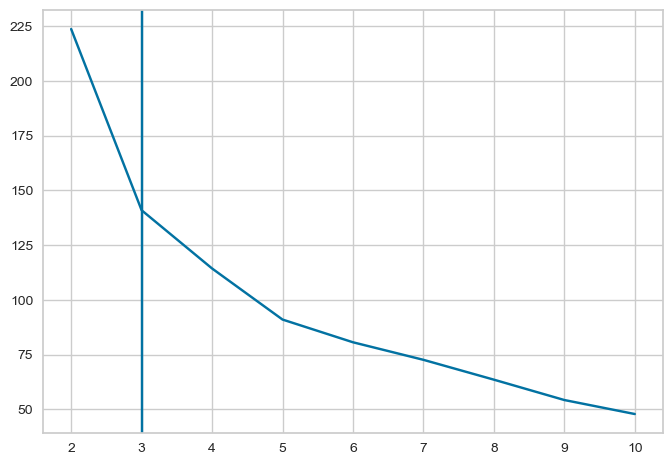

In [81]:
sns.lineplot(x=[2,3,4,5,6,7,8,9,10], y = curve)
plt.axvline (x=3,color= 'b')
plt.grid(True)
plt.show()

In [ ]:
# c
labels=[]
for i in range(2,11):
    km = KMeans(n_clusters=i)
    km.fit(df_scaled)
    labels.append(km.labels_)
    sns.scatterplot(x=1,y=2,data=df,hue = km.labels_)

In [83]:
# d
km = KMeans(n_clusters=3)
labels = km.fit_predict(df_scaled)
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [88]:
df['Cluster_Label'] = labels
df['Cluster_Label'].unique()

array([1, 2, 0])

Text(0.5, 1.0, 'ScatterPlot')

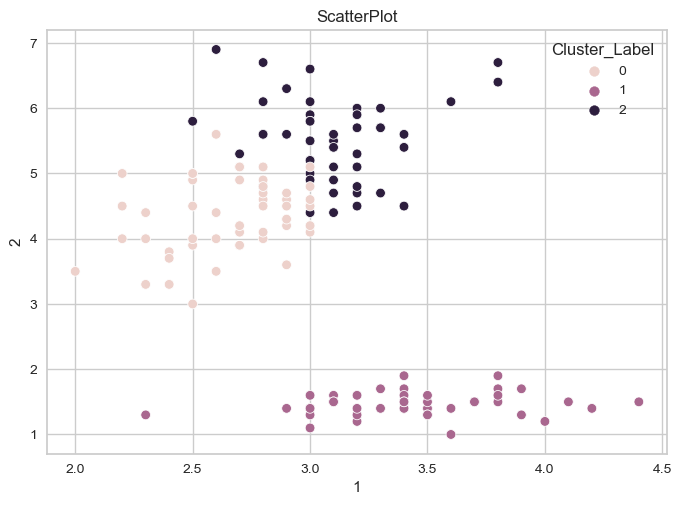

In [89]:
sns.scatterplot(x=1,y=2,data=df,hue = df['Cluster_Label']).set_title('ScatterPlot')

In [85]:
# e
sil_score=[]
for i in range(2,11):
    km=KMeans(n_clusters= i)
    km.fit(df_scaled)
    ss= silhouette_score(df_scaled, km.labels_)
    print('Silhoutte score for ',i,'cluster is : ',ss)
    sil_score.append(ss)

Silhoutte score for  2 cluster is :  0.580184463257396
Silhoutte score for  3 cluster is :  0.4589717867018717
Silhoutte score for  4 cluster is :  0.39048202055389036
Silhoutte score for  5 cluster is :  0.34677767446020835
Silhoutte score for  6 cluster is :  0.3260759517825793
Silhoutte score for  7 cluster is :  0.3288316216404738
Silhoutte score for  8 cluster is :  0.3301794998577949
Silhoutte score for  9 cluster is :  0.35624702245333717
Silhoutte score for  10 cluster is :  0.3476149997675467
